# Plan scheduling toy example

This example fits a simple sequence-to-sequence Neural Network for estimating the duration of agents' activities, given the set (and order) of activities in their plan.

The aim is to showcase the modelling approach, and perform a set of "first-principles" checks.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pam.planner.choice_scheduling import ScheduleModelSimple
from pam.read import load_travel_diary

## Set up and fit

Load the test population:

Using tour based purpose parser (recommended)
Adding pid->hh mapping to persons_attributes from trips.
Adding home locations to persons attributes using trips attributes.
Using freq of 'None' for all persons.


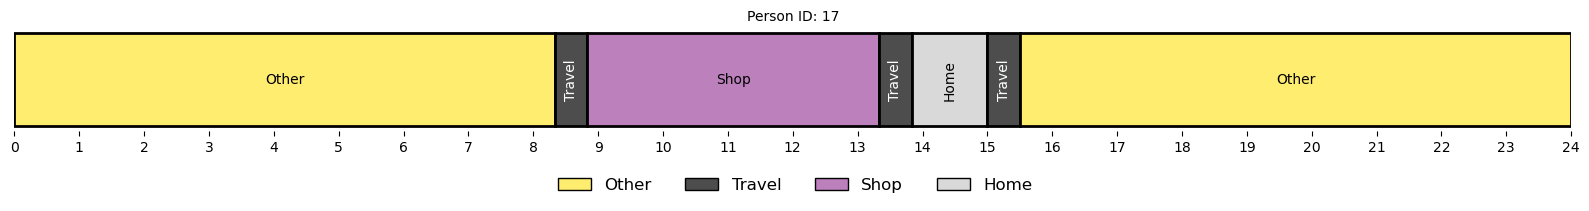

In [22]:
df_diaries = pd.read_csv("../../tests/test_data/simple_travel_diaries.csv")
df_persons = pd.read_csv("../../tests/test_data/simple_persons_data.csv")
population = load_travel_diary(trips=df_diaries, persons_attributes=df_persons)
population.random_person().plot()

Set up and fit the scheduling model:

In [23]:
model = ScheduleModelSimple(population, n_units=50, dropout=0.1)
model.fit(epochs=500)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emb (Embedding)     │ (None, 8, 1)      │          9 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 8)         │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_h1 (LSTM)   │ [(None, 50),      │     10,400 │ emb[0][0],        │
│                     │ (None, 50),       │            │ not_equal_1[0][0] │
│                     │ (None, 50)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_h1 (LSTM)   │ (None, 7, 50)     │     10,400 │ input_layer_3[0]… │
│                     │                   │            │ encoder_h1[0][1], │
│                     │                   │            │ encoder_h1[0][2]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_h2 (LSTM)   │ (None, 7, 50)     │     20,200 │ decoder_h1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_output      │ (None, 7, 1)      │         51 │ decoder_h2[0][0]  │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 41,060 (160.39 KB)

 Trainable params: 41,060 (160.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4720 - loss: 0.0482
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4720 - loss: 0.0462
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4720 - loss: 0.0445
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4720 - loss: 0.0434
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4720 - loss: 0.0423
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4720 - loss: 0.0414
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4720 - loss: 0.0408
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4720 - loss: 0.0400
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4720 - loss: 0.0391
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4720 - loss: 0.0381
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4720 - loss: 0.0373
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4720 - loss: 0.0363
Epo

Check convergence:

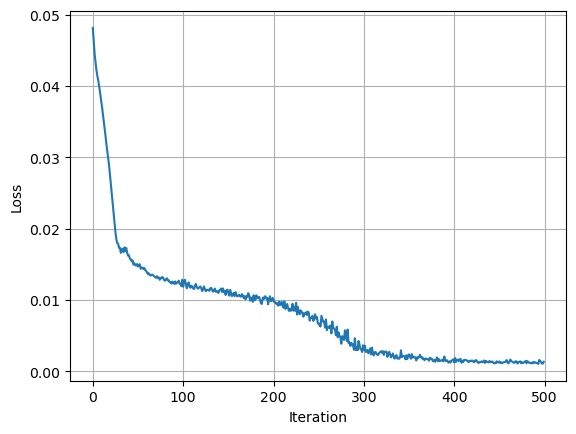

In [24]:
# loss history
pd.Series(model.history.history["loss"]).plot()
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

## Review

Now, let's do some in-place predictions, to assess whether the model is able to replicate observed patterns:

In [25]:
y_pred = model.predict(population)
y_pred[:, 1:].round(2) # ignore the first column (start-of-sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.38, 0.26, 0.33, 0.  , 0.  , 0.  , 0.  ],
       [0.39, 0.23, 0.11, 0.1 , 0.19, 0.  , 0.  ],
       [0.39, 0.23, 0.11, 0.1 , 0.19, 0.  , 0.  ],
       [0.38, 0.22, 0.11, 0.09, 0.17, 0.  , 0.  ],
       [0.35, 0.21, 0.12, 0.09, 0.09, 0.09, 0.  ],
       [0.39, 0.62, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.41, 0.62, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.37, 0.25, 0.34, 0.  , 0.  , 0.  , 0.  ],
       [0.39, 0.18, 0.08, 0.35, 0.  , 0.  , 0.  ],
       [0.39, 0.18, 0.08, 0.35, 0.  , 0.  , 0.  ],
       [0.37, 0.2 , 0.42, 0.  , 0.  , 0.  , 0.  ],
       [0.37, 0.2 , 0.42, 0.  , 0.  , 0.  , 0.  ],
       [0.39, 0.18, 0.08, 0.35, 0.  , 0.  , 0.  ],
       [0.39, 0.18, 0.08, 0.35, 0.  , 0.  , 0.  ],
       [0.37, 0.2 , 0.42, 0.  , 0.  , 0.  , 0.  ],
       [0.37, 0.2 , 0.42, 0.  , 0.  , 0.  , 0.  ],
       [0.38, 0.18, 0.08, 0.35, 0.  , 0.  , 0.  ],
       [0.38, 0.18, 0.08, 0.35, 0.  , 0.  , 0.  ],
       [0.37, 0.2 , 0.42, 0.  , 0.  , 0.  , 0.  ],
       [0.39, 0.18, 0.08, 0.35,

Below we plot the observed and predicted durations. We want to check the following questions:
* Do we get any non-zero duration predictions after the end of each plan sequence?
* Do the predicted non-zero durations match the number or activities?
* Do the overall predicted patterns reflect the observed patterns?

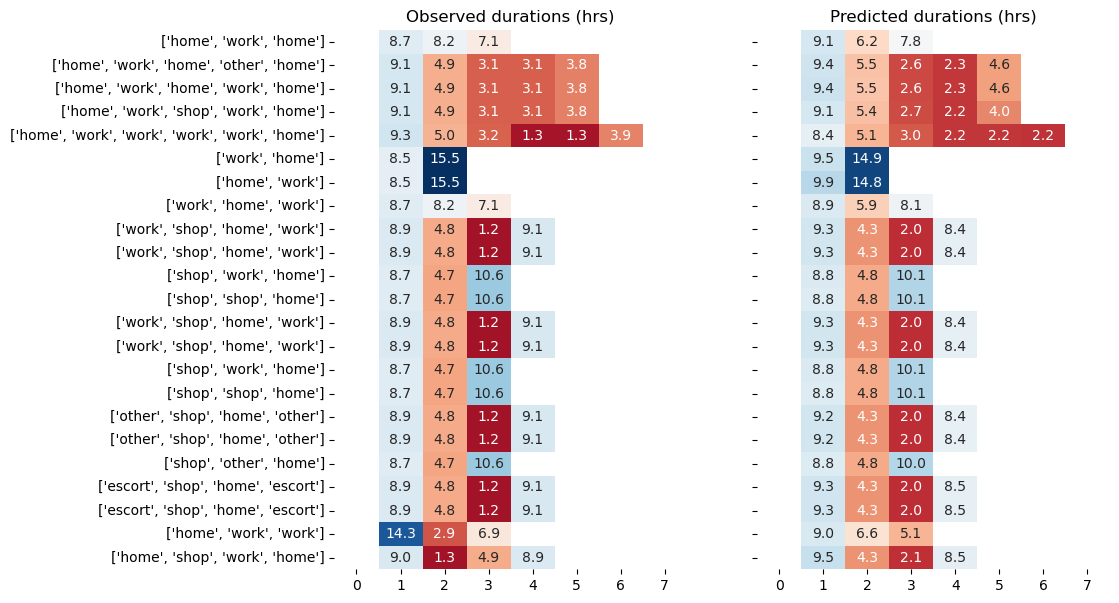

In [26]:
# heatmap
fig, axs = plt.subplots(1, 2, figsize=(10, 7), sharey=True)
cmap = "RdBu"
maxval = max(model.encoder.durations.max(), y_pred.max()) * 24
for i, arr in enumerate([model.encoder.durations, y_pred]):
    sns.heatmap(
        np.where(arr == 0, np.nan, arr) * 24,
        cmap=cmap,
        vmin=0,
        vmax=maxval,
        ax=axs[i],
        cbar=False,
        annot=True,
        fmt=".1f"
    )
labels = model.encoder.acts_labels
axs[0].set_yticks(np.arange(len(labels)) + 0.5)
axs[0].set_yticklabels(labels, rotation=0)
axs[0].set_title("Observed durations (hrs)")
axs[1].set_title("Predicted durations (hrs)")
plt.show()

Do the predicted durations add up to 1 (=24 hours)?

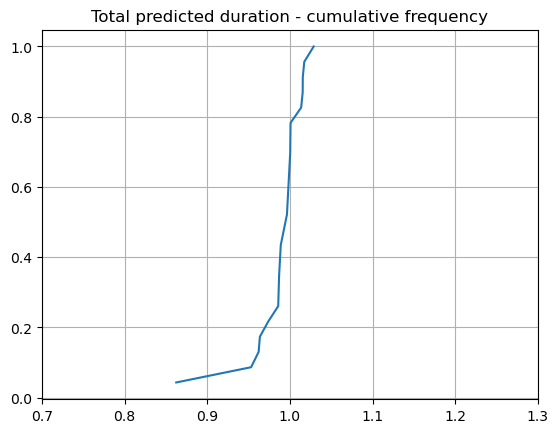

In [27]:
pd.Series(y_pred.sum(1)).value_counts(normalize=True).sort_index().cumsum().plot()
plt.title("Total predicted duration - cumulative frequency")
plt.xlim(0.7, 1.3)
plt.grid()
plt.show()

Do the predicted durations correlate well with the observed ones?

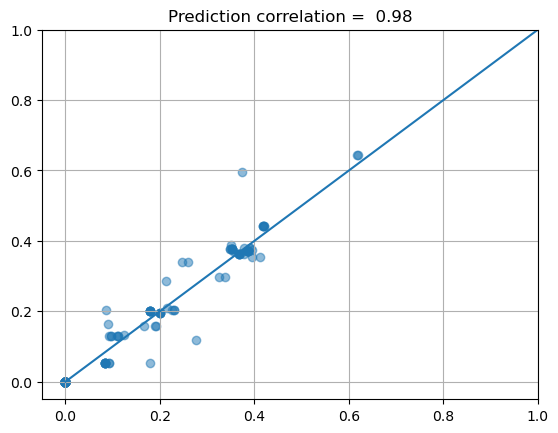

In [33]:
corr = np.corrcoef(y_pred.ravel(), model.encoder.durations.ravel())[0, 1]
plt.scatter(y_pred.ravel(), model.encoder.durations.ravel(), alpha=0.5)
plt.plot([0, 1], [0, 1])
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.title(f"Prediction correlation = {corr: .2f}")
plt.grid()